# Week 5: Better plots, docstrings, and SciPy

In this worksheet, we learn how to customise plots to better convey essential information. We also discuss docstrings in a little more depth. Finally, we introduce the **SciPy** module, and use some of the tools it provides for statistics and optimisation.

The best way to learn programming is to write code. Don't hesitate to edit the code in the example cells, or add your own code, to test your understanding. You will find practice exercises throughout the notebook, denoted by 🚩 **Exercise $x$**.

In [1]:
from show_solutions import show, initialise_path
show = initialise_path(show, '../solutions/w05_solutions.md')

---
## Customising plots

### Setting plot axis properties

#### Axis limits

The axis range on your plots can be controlled using the `.set_xlim()` and `.set_ylim()` methods. For example, the following code plots the function $\sin \left( x \right)$ for $x \in \left[ 0, 2 \pi \right]$ on the `Axes` object assigned to the variable `my_ax`, and then specifies that the $x$-axis range should be from $0$ to $2 \pi$, and the $y$-axis range should be from $-1.1$ to $1.1$.

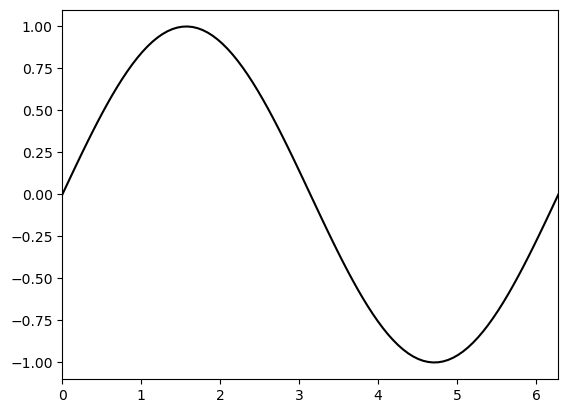

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Create 100 x-values from 0 to 2*pi
x = np.linspace(0, 2*np.pi, 100)

# Create the figure and axes
my_fig, my_ax = plt.subplots()

# Plot sin(x)
my_ax.plot(x, np.sin(x), 'k-')

# Adjust the x-axis and y-axis limits to tidy up the plot
my_ax.set_xlim([0, 2*np.pi])
my_ax.set_ylim([-1.1, 1.1])

# Show the figure
plt.show()

#### Axis labels

Axis labels can be added using the `.set_xlabel()` and `.set_ylabel()` methods, for example

```python
ax.set_xlabel('x', fontsize=12)
```

The label is the first argument, a string. The additional argument, `fontsize=12`, is used to control the font size of the axis label, here setting the font size to $12$pt.  If you wish you can use LaTeX in axis labels via

```python
ax.set_xlabel(r'$x$', fontsize=12)
```

where the `r` before the label means "raw string"; this allows backslashes in e.g. LaTeX math symbols to be interpreted correctly.

> Plots should **always** include appropriate labelling!


---
🚩 **Exercise 1**

Start by pasting your code for Exercise 8 in the Week 4 worksheet, to create the 3 plots again. Use `set_xlim` to control the $x$-axis range for each of the 3 plots, plotting values of $x \in \left[-\pi, \pi \right]$.

Use `set_xlabel` and `set_ylabel` to add axis labels to the plots, with a font size of ($14$)pt.

*Hints:*
* If the plot becomes a little squeezed, you can adjust the *spacing* between the subplots in a figure after you have created them, using the function `plt.subplots_adjust()`, for example
```python
plt.subplots_adjust(hspace=0.5, wspace=0.5)
```
where `hspace` (height spacing) and `wspace` (width spacing) should take values between 0 and 1. (See [Matplotlib: subplots_adjust](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots_adjust.html))
* Since the axes are indexed by number, you can use a `for` loop to set properties common to all axes.

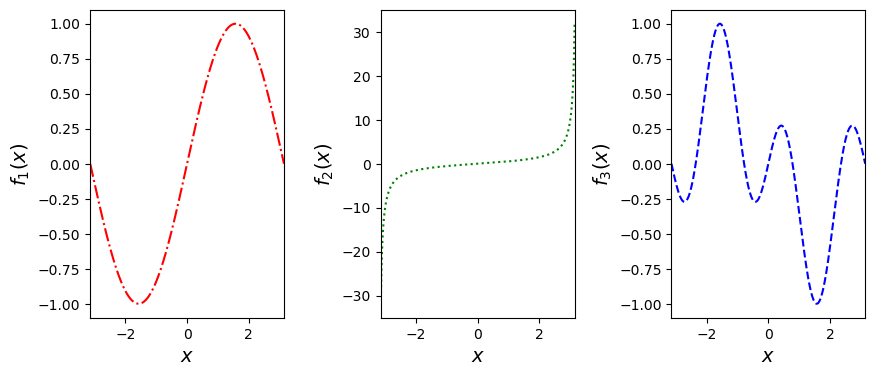

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Create an x-axis with 1000 points
x = np.linspace(-np.pi, np.pi, 1000)

# Evaluate the functions at all these points
f1 = np.sin(x)
f2 = np.tan(0.49*x)
f3 = np.sin(x) * np.cos(2*x)

# Create figure and axes
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# Plot each function in a different subplot
ax[0].plot(x, f1, 'r-.')
ax[1].plot(x, f2, 'g:')
ax[2].plot(x, f3, 'b--')

# Store y-axis label for each plot
y_labels = [r'$f_1(x)$', r'$f_2(x)$', r'$f_3(x)$']

# Set all 3 properties for the 3 plots
for i in range(3):
    ax[i].set_xlim([-np.pi, np.pi])
    ax[i].set_xlabel(r'$x$', fontsize=14)
    ax[i].set_ylabel(y_labels[i], fontsize=14)

# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Display the plot
plt.show()

In [4]:
show('Exercise 1')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
### Adding a legend

Earlier, we have seen how to display multiple lines on the same set of axes. When doing so, it is essential to add a legend to the plot, using **`ax.legend()`**, which labels all curves of the plot in `ax`. The label text should be set **when plotting the curve**, using the `label=` keyword argument of `.plot()`, and can contain LaTeX code.

For example, the following code displays a legend on `ax` with the green curve labelled $y_1$ and the yellow curve labelled $y_2$.

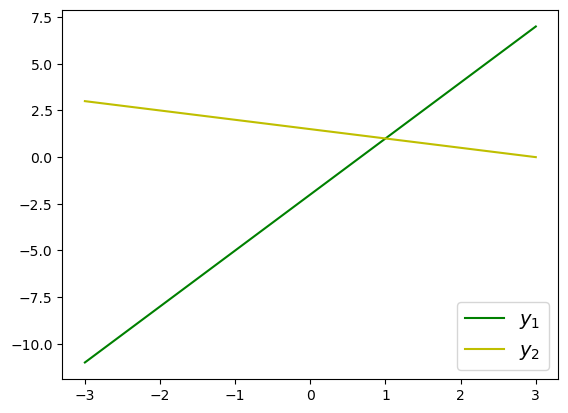

In [15]:
# Create an x-axis, and make 2 linear functions of x
x = np.linspace(-3, 3, 100)
y1 = 3*x - 2
y2 = -0.5*x + 1.5

# Plot both curves on the same axes
fig, ax = plt.subplots()
ax.plot(x, y1, 'g-', label=r'$y_1$')
ax.plot(x, y2, 'y-', label=r'$y_2$')

# .legend() will use the "label" arguments for each curve
ax.legend(loc='lower right', fontsize=14)

plt.show()

Note that the **location** can be controlled via an additional keyword argument `loc`, followed by a string indicating the location. Other locations can be chosen, for example you can try changing `'lower right'` to `'upper left'`.

The legend font size is also controlled the same way as for axis labels, e.g. here the font size is set to $14$.

---
**📚 Learn more:**
* [Matplotlib: legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html) - Documentation
* [Customizing Plot Legends](https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html) - The Python Data Science Handbook


---
🚩 **Exercise 2**

The Maclaurin series for $\cos(x)$ is given by

$$
\cos(x) = \sum_{k=0}^{\infty} (-1)^k \frac{x^{2k}}{(2k)!}.
$$

Create a new figure with a single set of axes. Plot $\cos(x)$ over the interval $[-\pi, \pi]$. On the same axes, plot the Maclaurin series truncated to the second, fourth, and sixth order terms, evaluated over the same interval. Set the axis ranges and labels, and add a legend to the plot.

*Hint:* you may wish to use the function [`math.factorial()` included with the `math` module](https://docs.python.org/3/library/math.html).

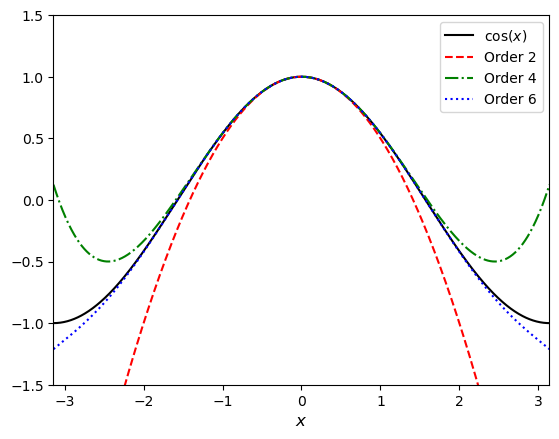

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Define a function for the truncated Maclaurin series
def trunc_macl(x, n):
    '''
    Return the truncated Maclaurin series for 
    cos(x), with terms up until order n
    '''
    macl_series = 0
    for k in range(n//2 + 1):
        # Add each term of the series up to nth order
        macl_series += (-1)**k * x**(2*k) / math.factorial(2*k)
    
    return macl_series

# Create 1000 x-values from -pi to pi
x = np.linspace(-np.pi, np.pi, 1000)

# Create a figure
fig, ax = plt.subplots()

# Plot the requested functions
ax.plot(x, np.cos(x), 'k-', label=r'$\cos(x)$')
ax.plot(x, trunc_macl(x, 2), 'r--', label=r'Order 2')
ax.plot(x, trunc_macl(x, 4), 'g-.', label=r'Order 4')
ax.plot(x, trunc_macl(x, 6), 'b:', label=r'Order 6')

# Set the axis properties
ax.set_xlim([-np.pi, np.pi])
ax.set_ylim([-1.5, 1.5])
ax.set_xlabel(r'$x$', fontsize=12)
ax.legend()

plt.show()

In [17]:
show('Exercise 2')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 3**

Reproduce the following figure, as closely as possible. (Note: the triangles are called "markers" -- you can search for that in the documentation.)

![The figure to reproduce.](img/fig.png)

In [ ]:
show('Exercise 3')

---

## Docstrings

Code is written to be readable and understandable to **humans**. The Python interpreter takes care of translating it to machine instructions for the computer.

**Docstrings** simply contain some information about what the function does and how it works. They are comments added to a function definition between `'''` triple quotes just below the `def` statement. They are meant to **document** your function, to explain how to use it and what it returns.

Conventionally, a docstring should consist of:

- a brief (1 or 2 sentences) description of what the function does,
- a description of all **input arguments** and their **type**,
- a description of all **outputs** and their **type**.

This is to ensure that anyone using your function knows what type(s) of objects it can be used on, and what type(s) of objects it returns. Here is an example:

In [22]:
def first_and_last(x):
    '''
    Returns the first and last characters of a string.
    
    Input:
        x (str): the input string.
    
    Output:
        out (str): a new string made of the first and
        the last characters of x.
    '''
    out = x[0] + x[-1]
    return out

print(first_and_last('Things'))

help(first_and_last)

Ts
Help on function first_and_last in module __main__:

first_and_last(x)
    Returns the first and last characters of a string.
    
    Input:
        x (str): the input string.
    
    Output:
        out (str): a new string made of the first and
        the last characters of x.



Note that when you use the function `help(some_function)`, the docstring of `some_function` is displayed.


---
**🚩 Exercise 4**

Make sure you understand what the following function does -- study its definition line-by-line, consult the documentation for `random.randint()`, and test it yourself by calling it with different inputs:

```python
import random

def random_letters(word, number_of_letters):
    list_of_letters = []

    for i in range(number_of_letters):
        index = random.randint(0, len(word)-1)
        letter = word[index]
        list_of_letters.append(letter)

    return list_of_letters
```

Then, write an appropriate docstring, following the convention outlined above, for the function.

In [27]:
import random

def random_letters(word, number_of_letters):
    '''
    Returns a list of number_of_letters randomly selected letters
    from a given word.

    Input:
        word (str): a string of characters representing a word
        number_of_letters (int): an integer representing the total 
            number of random letters we want to return
        
    Output:
        list_of_letters (list): a list of number_of_letters random letters
            from the input word.
    '''
    list_of_letters = []

    for i in range(number_of_letters):
        index = random.randint(0, len(word)-1)
        letter = word[index]
        list_of_letters.append(letter)
    
    return list_of_letters

help(random_letters)

Help on function random_letters in module __main__:

random_letters(word, number_of_letters)
    Returns a list of number_of_letters randomly selected letters
    from a given word.
    
    Input:
        word (str): a string of characters representing a word
        number_of_letters (int): an integer representing the total 
            number of random letters we want to return
        
    Output:
        list_of_letters (list): a list of number_of_letters random letters
            from the input word.



In [26]:
show('Exercise 4')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
## SciPy

The **SciPy** library provides a set of scientific computing tools for Python -- [it is actually a relative of Numpy](https://www.scipy.org/scipylib/faq.html#numpy-vs-scipy-vs-other-packages). I would recommend you have a browse of the documentation and tutorial linked below to get an idea of all the functionalities included. For this course, we will give a brief tour of some of SciPy's modules in action, to give you a sense of how they might be used to solve practical problems.


---
**📚 Learn more:**

* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/)
* [SciPy tutorial - Introduction](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html)
* [Frequently asked questions - SciPy documentation](https://www.scipy.org/scipylib/faq.html#frequently-asked-questions)
* [Optimization](https://docs.scipy.org/doc/scipy/reference/optimize.html) - This contains functions for finding minima (or maxima) and roots of equations in one or more dimensions.
* [Interpolation](https://docs.scipy.org/doc/scipy/reference/interpolate.html) - Contains functions for interpolating values using splines or other approximating polynomials.
* [Statistics](https://docs.scipy.org/doc/scipy/reference/stats.html) - Many more statistics related functions.
* [Integration](https://docs.scipy.org/doc/scipy/reference/integrate.html) - Contains functions for performing integration (using Simpson's rule and more complicated quadrature rules).


---

### Interpolating some noisy data

Suppose we have a set of data points $(x_i, y_i)$, with coordinates stored in vectors `x` and `y`. The **`interpolate` sub-module** provides tools to interpolate data. In particular, it contains many functions for constructing piecewise polynomials, and in particular [splines](https://en.wikipedia.org/wiki/Spline_(mathematics)).

Below is an example of how spline interpolation might be used:

0.8251963904206944
0.72986312103229


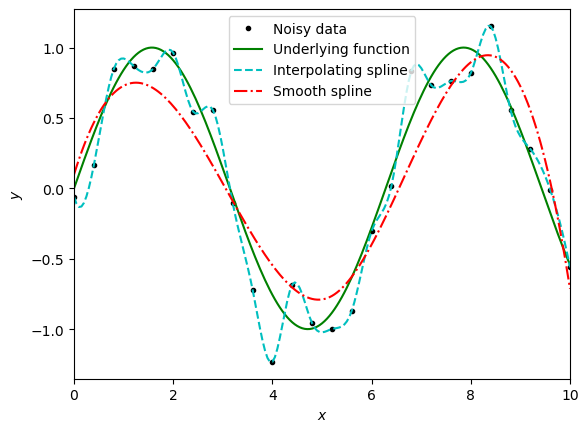

In [28]:
# First, import all necessary modules
import numpy as np
import scipy.interpolate
import scipy as scp
import matplotlib.pyplot as plt

# Generate some data that looks like a smooth curve with some noise overlayed:
def generate_data(x):
    '''
    Generate some smooth data (sin curve) with overlaid noise 
    coming from a Normal distribution.
    '''
    # Generate some noise from a Normal distribution - 
    # this generates an array of values simulated from 
    # an N(0, 0.3**2), with the array of the same length as x:
    noise = np.random.normal(0, 0.2, len(x))
    y = np.sin(x) + noise
    return y

# Set up x and generate y data:
step = 0.4
x = np.arange(0, 10 + step, step)
y = generate_data(x)

# Make an interpolating function - this one goes through all of the 
# data points, and joins them with a piecewise cubic function:
f_interp = scp.interpolate.interp1d(x, y, kind='cubic')

# Now fit a spline using a different function that takes a smoothing 
# parameter s, this spline won't go through all of the points but will 
# look smoother:
f_smooth = scp.interpolate.UnivariateSpline(x, y, s=2)

# Now suppose we want a value for y at a point in between
# our x values - let's say x = 1.5:
print(f_interp(1.5))
print(f_smooth(1.5))

# Make a denser x-axis to plot our interpolated functions
xmin, xmax = x[0], x[-1]
dense_step = 0.05
x_dense = np.arange(xmin, xmax + dense_step, dense_step)

# Plot the data
fig, ax = plt.subplots()

ax.plot(x, y, 'k.', label='Noisy data')
ax.plot(x_dense, np.sin(x_dense), 'g-', label='Underlying function')
ax.plot(x_dense, f_interp(x_dense), 'c--', label='Interpolating spline')
ax.plot(x_dense, f_smooth(x_dense), 'r-.', label='Smooth spline')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_xlim([xmin, xmax])
ax.legend(loc='upper center')

plt.show()

Note that the interpolating functions (here, `scp.interpolate.interp1d()` and `scp.interpolate.UnivariateSpline`) **return a function object**, which we can then call as any other function.

Make sure to look up the two spline fitting functions to check you understand how the call here matches what is in the documentation.


---
**🚩 Exercise**

* Try a different function as the smooth background function from `np.sin(x)`.
* Modify the function `generate_data()` to also take the standard deviation of the noise as input. Experiment with different values, and observe how well or poorly the splines fit the data, depending on how noisy it is.
* Try changing the smoothing parameter `s` in the second fitted spline. How does this change the result? Can you make it look like the first interpolating spline?


---

### Summary statistics, reading a file

Next, let's look at some descriptive statistics (means, variance, etc). To do that, we can examine some real data -- the file `oil_reserve_data.csv` should have been downloaded to your computer (and should therefore be in the same directory as this notebook) when you cloned this week's repository. The file is a slightly edited version of one that comes from [this EU data source](http://data.europa.eu/euodp/en/data/dataset/RH8xH4aVauYKO92JJxv8sA). It describes the emergency oil reserves kept by several European countries over recent years.

In [29]:
import numpy as np
import scipy.stats as stats

# Use Numpy's loadtxt function to open the data file:
oil_data = np.loadtxt('oil_reserve_data.csv',
                      dtype=float,
                      delimiter=',',
                      skiprows=1,
                      usecols=(1, 2, 3, 4))

Note that we have to skip a row and not use the first column in order to get a section of this file that is all of floating point type. Have a look at the file e.g. in Excel to see what it looks like. (In a couple of weeks, we will see better ways to import this type of data, using the `pandas` module.)

In [30]:
# Unpack each column into a different array named for the 
# country depicted in the data (use transpose to obtain the
# array as a list of rows):
germany, denmark, belgium, bulgaria = oil_data.T

# Use the describe function to get basic summary statistics:
print('stats.describe output:')
print('Germany:\n', stats.describe(germany))
print('Denmark:\n', stats.describe(denmark))

# Find the 5% and 95% percentile locations:
print('\n5% and 95% percentiles:')
print(np.percentile(germany, (5, 95)))

# Find the Pearson's and Spearman's correlation coefficients
# between two columns:
print('\nCorrelation coefficients for Germany/Denmark and Germany/Bulgaria:')
print(stats.pearsonr(germany, denmark))
print(stats.spearmanr(germany, bulgaria))

# We can save out an array to a file using Numpy's
# savetxt() function:
np.savetxt('belgium.txt', belgium)

stats.describe output:
Germany:
 DescribeResult(nobs=84, minmax=(19442.0, 23201.0), mean=20481.321428571428, variance=1151825.64242685, skewness=1.59923245491272, kurtosis=1.309547186736916)
Denmark:
 DescribeResult(nobs=84, minmax=(1199.0, 1285.0), mean=1233.047619047619, variance=614.166379804934, skewness=0.36482753768568393, kurtosis=-0.5897608901965672)

5% and 95% percentiles:
[19442. 22860.]

Correlation coefficients for Germany/Denmark and Germany/Bulgaria:
PearsonRResult(statistic=0.857762025958861, pvalue=2.0451989262018716e-25)
SignificanceResult(statistic=0.1955431754874652, pvalue=0.07465463221414935)


---
🚩 **Exercise 5**
- What is the median value for Bulgaria? the mode? the geometric mean?
- Try finding correlations between the different columns.
- Can you find a linear relationship between the data from Germany and Denmark (i.e., can you fit a linear function $y = ax + b$, where $x$ is the data for Germany and $y$ the data for Bulgaria)?

Look for the relevant functions in the documentation for Numpy and for `scipy.stats`.

In [33]:
# Statistics for Bulgaria
mode, count = stats.mode(bulgaria)
print('Bulgaria:\n',
      f'Median = {np.median(bulgaria):.1f}\n',
      f'Mode = {mode[0]:.1f}, appearing {count[0]:d} times ({100*count[0]/len(bulgaria):.1f}% of the time)\n',
      f'Geometric mean = {stats.gmean(bulgaria):.2f}\n')

IndexError: invalid index to scalar variable.

In [31]:
show('Exercise 5')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
### Optimisation

The module `scipy.optimize` may be of interest for those of you interested in optimisation, for instance in operational research. For example, let's try one of the problems from [this page](http://people.brunel.ac.uk/~mastjjb/jeb/or/morelp.html):

> A carpenter makes tables and chairs. Each table can be sold for a profit of £30 and each chair for a profit of £10.
> 1. The carpenter can afford to spend up to 40 hours per week working and takes six hours to make a table and three hours to make a chair.
> 2. Customer demand requires that they make at least three times as many chairs as tables.
> 3. Tables take up four times as much storage space as chairs and there is room for at most four tables each week.

The goal is to **maximise** the profit that the carpenter can make in 1 week, by finding the optimal number of tables $x_T$ and number of chairs $x_C$ that they should make.

This is a *linear programming problem*: we need to maximise the weekly profit, given by the objective function $f(x_T, x_C) = 30x_T + 10x_C$, subject to 3 linear constraints:

$$
\begin{align}
0. & & x_T &\geq 0, x_C \geq 0 \\
1. & & 6x_T + 3x_C &\leq 40 \\
2. & & x_C &\geq 3x_T \\
3. & & x_C/4 + x_T &\leq 4
\end{align}
$$

We can use [`scipy.optimize.linprog()`](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#linear-programming-linprog) to solve this problem, but first we need to rearrange it a little bit, to fit the kind of input that this function takes.

$$
\begin{align}
&\min_{x_T, x_C} -30x_T - 10x_C, \\
&\text{such that} \quad
\begin{bmatrix}
-1 & 0 \\
0 & -1 \\
6 & 3 \\
3 & -1 \\
1 & \frac{1}{4}
\end{bmatrix}
\begin{bmatrix}
x_T \\ x_C
\end{bmatrix}
\leq
\begin{bmatrix}
0 \\ 0 \\ 40 \\ 0 \\ 4
\end{bmatrix}.
\end{align}
$$

Looking at the documentation, the default bounds on the variable values is that they are non-negative, which corresponds to our problem here -- so we don't need to specify them.

In [34]:
from scipy.optimize import linprog

A = np.array([[6, 3],
              [3, -1],
              [1, 0.25]])

b = np.array([40, 0, 4], dtype=float)
c = np.array([-30, -10], dtype=float)

solution = linprog(c, A, b)
print('Output of linprog:')
print(solution, '\n')

results = A @ solution.x

print(f'The optimal strategy is to make {solution.x[0]:.2f} tables',
      f'and {solution.x[1]:.2f} chairs every week (on average), for',
      f'a profit of £{-solution.fun:.2f} per week.',
      f'This is {results[0]:.1f} hours of work per week, '
      f'taking up {100*results[2]/4:.1f}% of storage space.')

Output of linprog:
        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -146.66666666666669
              x: [ 1.333e+00  1.067e+01]
            nit: 2
          lower:  residual: [ 1.333e+00  1.067e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  6.667e+00  0.000e+00]
                 marginals: [-1.667e+00 -0.000e+00 -2.000e+01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0 

The optimal strategy is to make 1.33 tables and 10.67 chairs every week (on average), for a profit of £146.67 per week. This is 40.0 hours of work per week, taking up 100.0% of storage space.


There are many other optimisation and root-finding methods available in `scipy.optimise`, each more or less well-suited to different problems. When faced with such a problem, the best thing to do is to have a browse in the documentation, and find if there is perhaps a method already implemented there that you could use.

---
🚩 **Exercise 6**

The carpenter is aiming to make a profit of at least £150 per week, but now they have twice the storage space. What is the minimum number of hours they need to work in a week to achieve this?

What if they have to make exactly 3 chairs for each table?

In [35]:
show('Exercise 6')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…